In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
#Função para calcular ocorrencia de nomes
def count_occurrence(df, column):
    counter = {}

    items = df[column].to_list()

    for item in items:
        for objct in item.split(','):
            name = objct.strip()
            if name in counter.keys():
                counter[name] += 1
            else:
                counter[name] = 1

    return {k: v for k, v in sorted(counter.items(), 
                                    key=lambda item: item[1],
                                    reverse=True)}

# Carregando os Dados

In [112]:
df = pd.read_csv('../data/movies.csv', delimiter=';', index_col=0)
print(df.shape)
df.head()

(1000, 11)


,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.0,757074,333.0,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.0,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.0,157606,138.0,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.0,60545,270.0,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.0,393727,325.0,40.0


# Dados Faltantes

In [71]:
if (df.isnull().values.any()):
    missing_data = {}
    for column in list(df.columns)[1:]:
        missing_data[column] = df[column].isnull().sum()

print(missing_data)

{'Title': 0, 'Genre': 0, 'Director': 0, 'Actors': 0, 'Year': 0, 'Runtime': 0, 'Rating': 0, 'Votes': 0, 'RevenueMillions': 128, 'Metascore': 64}


# Estatísticas dos dados numéricos

In [72]:
df[list(df.columns)[1:]].describe()

,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
count,1000.000000,1000.000000,1000.00000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.77300,1.698083e+05,82.943807,58.985043
std,3.205962,18.810908,0.98511,1.887626e+05,103.254260,17.194757
min,2006.000000,66.000000,2.00000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.00000,3.630900e+04,13.000000,47.000000
50%,2014.000000,111.000000,7.00000,1.107990e+05,48.000000,59.500000
75%,2016.000000,123.000000,7.00000,2.399098e+05,114.000000,72.000000
max,2016.000000,191.000000,9.00000,1.791916e+06,937.000000,100.000000


In [73]:
df[df['RevenueMillions'].isna()]

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
7,8,Mindhorn,Comedy,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.0,2490,NaN,71.0
22,23,Hounds of Love,"Crime,Drama,Horror",Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,7.0,1115,NaN,72.0
25,26,Paris pieds nus,Comedy,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,7.0,222,NaN,NaN
39,40,5- 25- 77,"Comedy,Drama",Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...",2007,113,7.0,241,NaN,NaN
42,43,Don't Fuck in the Woods,Horror,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,3.0,496,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
977,978,Amateur Night,Comedy,Lisa Addario,"Jason Biggs, Janet Montgomery,Ashley Tisdale, ...",2016,92,5.0,2229,NaN,38.0
978,979,It's Only the End of the World,Drama,Xavier Dolan,"Nathalie Baye, Vincent Cassel, Marion Cotillar...",2016,97,7.0,10658,NaN,48.0
988,989,Martyrs,Horror,Pascal Laugier,"Morjana Alaoui, Mylène Jampanoï, Catherine Bég...",2008,99,7.0,63785,NaN,89.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.0,27585,NaN,45.0


# A maioria dos menos votados não possuem informação sobre receita

In [168]:
df[df['Votes'] <= 500]

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
25,26,Paris pieds nus,Comedy,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,7.0,222,NaN,NaN
39,40,5- 25- 77,"Comedy,Drama",Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...",2007,113,7.0,241,NaN,NaN
42,43,Don't Fuck in the Woods,Horror,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,3.0,496,NaN,NaN
44,45,Lowriders,Drama,Ricardo de Montreuil,"Gabriel Chavarria, Demián Bichir, Theo Rossi,T...",2016,99,6.0,279,4.0,57.0
68,69,Wakefield,Drama,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,8.0,291,0.0,61.0
250,251,Bonjour Anne,"Comedy,Drama,Romance",Eleanor Coppola,"Diane Lane, Alec Baldwin, Arnaud Viard, Linda ...",2016,92,5.0,178,0.0,50.0
293,294,The Exception,Drama,David Leveaux,"Lily James, Jai Courtney, Christopher Plummer,...",2016,107,8.0,96,NaN,NaN
307,308,Vincent N Roxxy,"Crime,Drama,Thriller",Gary Michael Schultz,"Emile Hirsch, Zoë Kravitz, Zoey Deutch,Emory C...",2016,110,6.0,403,NaN,NaN
337,338,Tracktown,"Drama,Sport",Alexi Pappas,"Alexi Pappas, Chase Offerle, Rachel Dratch, An...",2016,88,6.0,115,NaN,64.0
367,368,American Wrestler: The Wizard,"Drama,Sport",Alex Ranarivelo,"William Fichtner, Jon Voight, Lia Marie Johnso...",2016,117,7.0,286,NaN,NaN


# Outliers ou erros?

Será que se a receita é 0 o filme deu prejuízo, não foi divulgada, o que acontece?

Consultando o site https://www.the-numbers.com/, temos os seguintes valores para receita no mundo:

Dead Awake -> 24.137
Wakefield -> 874.187
The Void -> 377.624
White Girl -> 200.242
A Kind of Murder -> 91.149

Portanto são valores abaixo de 1 milhão, o que não caracteriza um erro.

Ainda, segundo o mesmo site a receita de alguns dos filmes com nan em vez de zero:

Mindhorn -> 816.452
Hounds of Love -> 245.909
Paris pieds nus -> 2.061.263

Já é uma questão de disponibilidade dos dados - alguns filmes foram lançados
apenas em streaming portanto não contam com esse tipo de dado.

In [74]:
print(len(df[df['RevenueMillions'] < 1]))
df[df['RevenueMillions'] < 1].head()

59


,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
27,28,Dead Awake,"Horror,Thriller",Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,5.0,523,0.0,NaN
68,69,Wakefield,Drama,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,8.0,291,0.0,61.0
97,98,The Void,"Horror,Mystery,Sci-Fi",Jeremy Gillespie,"Aaron Poole, Kenneth Welsh,Daniel Fathers, Kat...",2016,90,6.0,9247,0.0,62.0
152,153,White Girl,Drama,Elizabeth Wood,"Morgan Saylor, Brian Marc, Justin Bartha, Adri...",2016,88,6.0,4299,0.0,65.0
231,232,A Kind of Murder,"Crime,Drama,Thriller",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.0,3305,0.0,50.0


# Contagem de Atores, Gêneros, Diretores

In [136]:
print(list(count_occurrence(df, "Actors").items())[:10])
print(list(count_occurrence(df, "Genre").items())[:10])
print(list(count_occurrence(df, "Director").items())[:10])

[('Mark Wahlberg', 15), ('Hugh Jackman', 14), ('Christian Bale', 13), ('Brad Pitt', 13), ('Michael Fassbender', 12), ('Scarlett Johansson', 12), ('Anne Hathaway', 12), ('Robert Downey Jr.', 12), ('Johnny Depp', 12), ('Tom Hardy', 12)]
[('Drama', 513), ('Action', 303), ('Comedy', 279), ('Adventure', 259), ('Thriller', 195), ('Crime', 150), ('Romance', 141), ('Sci-Fi', 120), ('Horror', 119), ('Mystery', 106)]
[('Ridley Scott', 8), ('M. Night Shyamalan', 6), ('David Yates', 6), ('Paul W.S. Anderson', 6), ('Michael Bay', 6), ('Denis Villeneuve', 5), ('Christopher Nolan', 5), ('Antoine Fuqua', 5), ('Justin Lin', 5), ('J.J. Abrams', 5)]


# Histogramas das avaliações

Podemos ver que as avaliações dos críticos são mais bem distribuídas

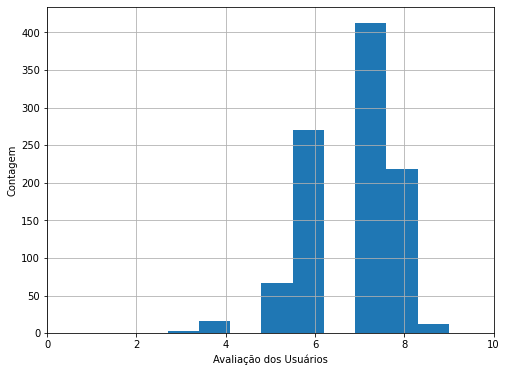

In [98]:
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(df['Rating'], 10, density=False)
plt.xlabel('Avaliação dos Usuários')
plt.ylabel('Contagem')
plt.xlim(0, 10)
plt.grid(True)
plt.show()

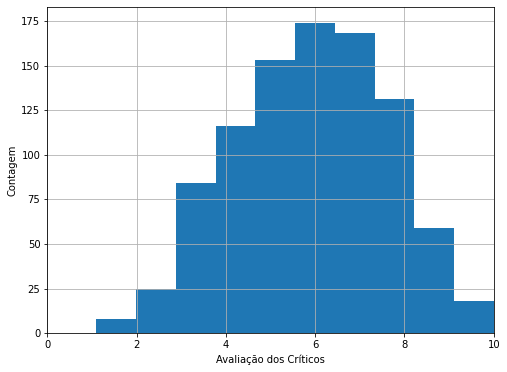

In [102]:
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(df['Metascore']/10, 10, density=False)
plt.xlabel('Avaliação dos Críticos')
plt.ylabel('Contagem')
plt.xlim(0, 10)
plt.grid(True)
plt.show()

# Divergência de opiniões

Em quantos filmes as notas do críticos divergem mais que um com a nota dos 
espectadores comuns?

Quais são os filmes mais contraditórios?

Que ator/atriz mais diverge opiniões?

In [121]:
print(df[abs(df['Rating'] - df['Metascore']/10) >= 1].shape)
print(df[abs(df['Rating'] - df['Metascore']/10) >= 2].shape)
print(df[abs(df['Rating'] - df['Metascore']/10) >= 3].shape)
print(df[abs(df['Rating'] - df['Metascore']/10) >= 4].shape)
print(df[abs(df['Rating'] - df['Metascore']/10) >= 5].shape)

(537, 11)
(218, 11)
(63, 11)
(15, 11)
(0, 11)


In [145]:
contra = df[abs(df['Rating'] - df['Metascore']/10) >= 3]
contra

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
51,52,Underworld: Blood Wars,"Action,Adventure,Fantasy",Anna Foerster,"Kate Beckinsale, Theo James, Tobias Menzies, L...",2016,91,6.0,41362,30.0,23.0
52,53,Mother's Day,"Comedy,Drama",Garry Marshall,"Jennifer Aniston, Kate Hudson, Julia Roberts, ...",2016,118,6.0,20221,32.0,18.0
73,74,Collateral Beauty,"Drama,Romance",David Frankel,"Will Smith, Edward Norton, Kate Winslet, Micha...",2016,97,7.0,43977,31.0,23.0
91,92,Warcraft,"Action,Adventure,Fantasy",Duncan Jones,"Travis Fimmel, Paula Patton, Ben Foster, Domin...",2016,123,7.0,187547,47.0,32.0
215,216,Gods of Egypt,"Action,Adventure,Fantasy",Alex Proyas,"Brenton Thwaites, Nikolaj Coster-Waldau, Gerar...",2016,126,6.0,73568,31.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
983,984,Let's Be Cops,Comedy,Luke Greenfield,"Jake Johnson, Damon Wayans Jr., Rob Riggle, Ni...",2014,104,7.0,112729,82.0,30.0
987,988,Endless Love,"Drama,Romance",Shana Feste,"Gabriella Wilde, Alex Pettyfer, Bruce Greenwoo...",2014,104,6.0,33688,23.0,30.0
991,992,Taare Zameen Par,"Drama,Family,Music",Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,9.0,102697,1.0,42.0
998,999,Search Party,"Adventure,Comedy",Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,6.0,4881,NaN,22.0


In [146]:
#quem mais aparece em filmes contraditórios?
print(list(count_occurrence(contra, "Actors").items())[:10])

#quais são os gêneros?
print(list(count_occurrence(contra, "Genre").items())[:10])

#E os diretores?
print(list(count_occurrence(contra, "Director").items())[:10])

### Não estou surpreso que o Adam Sandler está em primeiro lugar.

[('Adam Sandler', 6), ('Gerard Butler', 4), ('Kate Hudson', 3), ('Maggie Grace', 3), ('Kevin James', 3), ('Theo James', 2), ('Will Smith', 2), ('Paula Patton', 2), ('Ben Foster', 2), ('Dominic Cooper', 2)]
[('Drama', 31), ('Comedy', 22), ('Action', 21), ('Romance', 16), ('Thriller', 11), ('Adventure', 10), ('Crime', 10), ('Fantasy', 6), ('Horror', 5), ('Mystery', 4)]
[('Frank Coraci', 2), ('Dennis Dugan', 2), ('Anna Foerster', 1), ('Garry Marshall', 1), ('David Frankel', 1), ('Duncan Jones', 1), ('Alex Proyas', 1), ('Alan Taylor', 1), ('Olivier Nakache', 1), ('Dan Mazer', 1)]


# Será que Críticos não gostam de comédia?

De fato não está entre seus gêneros favoritos, mas com certeza a briga é entre
Westerns e Romances.

Seriam todos os fãs de história críticos em potencial?

In [161]:
ranks_by_genre = pd.DataFrame(columns=['genre', 'mean_Rating', 'mean_Metascore'])
for genre in list(count_occurrence(df, "Genre").keys()):
    mean_rating = df[df['Genre'].str.contains(genre)]['Rating'].mean()
    mean_metascore = df[df['Genre'].str.contains(genre)]['Metascore'].mean()
    ranks_by_genre = ranks_by_genre.append({
        'genre': genre,
        'mean_Rating': mean_rating,
        'mean_Metascore': mean_metascore,
        'diff': abs(mean_rating - mean_metascore/10)
    }, ignore_index=True)

In [162]:
ranks_by_genre

,genre,mean_Rating,mean_Metascore,diff
0,Drama,7.005848,63.497890,0.656059
1,Action,6.663366,53.830450,1.280321
2,Comedy,6.695341,57.604478,0.934893
3,Adventure,6.837838,57.670683,1.070770
4,Thriller,6.620513,58.677596,0.752753
5,Crime,6.833333,57.787234,1.054610
6,Romance,6.723404,55.458015,1.177603
7,Sci-Fi,6.775000,58.228070,0.952193
8,Horror,6.151261,56.685185,0.482742
9,Mystery,6.943396,59.272727,1.016123


# Qual filme Adam Sandler não deveria ter feito?

Felizmente não tive o desprazer de assistir The Ridiculous 6, parece que há um 
consenso entre espectadores comuns e críticos. 

E que belo combo, Comédia, Western e Adam Sandler, os favoritos da crítica.

In [163]:
df[df['Actors'].str.contains('Adam Sandler')]

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
339,340,Blended,"Comedy,Romance",Frank Coraci,"Adam Sandler, Drew Barrymore, Wendi McLendon-C...",2014,117,7.0,93764,46.0,31.0
386,387,Pixels,"Action,Comedy,Family",Chris Columbus,"Adam Sandler, Kevin James, Michelle Monaghan,P...",2015,105,6.0,101092,79.0,27.0
394,395,Grown Ups 2,Comedy,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",2013,101,5.0,114482,134.0,19.0
458,459,Just Go with It,"Comedy,Romance",Dennis Dugan,"Adam Sandler, Jennifer Aniston, Brooklyn Decke...",2011,117,6.0,182069,103.0,33.0
537,538,The Do-Over,"Action,Adventure,Comedy",Steven Brill,"Adam Sandler, David Spade, Paula Patton, Kathr...",2016,108,6.0,24761,1.0,22.0
642,643,The Ridiculous 6,"Comedy,Western",Frank Coraci,"Adam Sandler, Terry Crews, Jorge Garcia, Taylo...",2015,119,5.0,31149,NaN,18.0
722,723,Grown Ups,Comedy,Dennis Dugan,"Adam Sandler, Salma Hayek, Kevin James, Chris ...",2010,102,6.0,190385,162.0,30.0
788,789,Hotel Transylvania 2,"Animation,Comedy,Family",Genndy Tartakovsky,"Adam Sandler, Andy Samberg, Selena Gomez, Kevi...",2015,89,7.0,69157,170.0,44.0
837,838,You Don't Mess with the Zohan,"Action,Comedy",Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",2008,113,6.0,163144,100.0,54.0


# Os favoritos da crítica

In [179]:
directors_metascore = {}

for director, count in count_occurrence(df, "Director").items():
    mean_metascore = df[df['Director'].str.contains(director)]['Metascore'].mean()
    directors_metascore[director] = (mean_metascore, count)

directors_metascore = {k: v for k, v in sorted(directors_metascore.items(), 
                                                key=lambda item: item[1],
                                                reverse=True)}

In [180]:
list(directors_metascore.items())[:10]

[('Kathryn Bigelow', (94.5, 2)),
 ('Damien Chazelle', (90.5, 2)),
 ('Paul Thomas Anderson', (86.5, 3)),
 ('Wes Anderson', (85.0, 3)),
 ('George Miller', (83.5, 2)),
 ('Steve McQueen', (83.33333333333333, 3)),
 ('Ethan Coen', (81.0, 3)),
 ('Jason Reitman', (81.0, 2)),
 ('Judd Apatow', (80.0, 3)),
 ('Lee Daniels', (79.0, 2))]

In [181]:
actors_metascore = {}

for actor, count in count_occurrence(df, "Actors").items():
    mean_metascore = df[df['Actors'].str.contains(actor)]['Metascore'].mean()
    actors_metascore[actor] = (mean_metascore, count)

actors_metascore = {k: v for k, v in sorted(actors_metascore.items(), 
                                                key=lambda item: item[1],
                                                reverse=True)}

In [182]:
list(actors_metascore.items())[:10]

[('Mahershala Ali', (99.0, 2)),
 ('Zoë Kravitz', (90.0, 2)),
 ('Kyle Chandler', (86.25, 4)),
 ('Jacob Tremblay', (86.0, 3)),
 ('Joaquin Phoenix', (85.5, 3)),
 ('Ed Harris', (84.0, 3)),
 ('Michael Gambon', (82.5, 2)),
 ('Greta Gerwig', (82.0, 2)),
 ('Bill Hader', (81.66666666666667, 3)),
 ('Olivia Colman', (81.5, 2))]

# E por fim os favoritos dos executivos

In [185]:
# $$$
directors_money = {}

for director, count in count_occurrence(df, "Director").items():
    mean_revenue = df[df['Director'].str.contains(director)]['RevenueMillions'].mean()
    directors_money[director] = (mean_revenue, count)

directors_money = {k: v for k, v in sorted(directors_money.items(), 
                                                key=lambda item: item[1],
                                                reverse=True)}

In [186]:
list(directors_money.items())[:10]

[('James Cameron', (761.0, 1)),
 ('Joss Whedon', (541.0, 2)),
 ('Gary Ross', (408.0, 2)),
 ('Gareth Edwards', (366.5, 2)),
 ('J.J. Abrams', (336.8, 5)),
 ('Anthony Russo', (334.0, 2)),
 ('Francis Lawrence', (325.0, 4)),
 ('Pierre Coffin', (310.0, 2)),
 ('Christopher Nolan', (303.0, 5)),
 ('David Yates', (271.8333333333333, 6))]

In [189]:
actors_money = {}

for actor, count in count_occurrence(df, "Actors").items():
    mean_revenue = df[df['Actors'].str.contains(actor)]['RevenueMillions'].mean()
    actors_money[actor] = (mean_revenue, count)

actors_money = {k: v for k, v in sorted(actors_money.items(), 
                                                key=lambda item: item[1],
                                                reverse=True)}

In [190]:
list(actors_money.items())[:10]

[('Oscar Isaac', (481.0, 3)),
 ('Rupert Grint', (317.5, 4)),
 ('Michelle Rodriguez', (299.25, 5)),
 ('Taylor Lautner', (291.3333333333333, 4)),
 ('Gwyneth Paltrow', (278.75, 4)),
 ('Tyrese Gibson', (277.25, 4)),
 ('Richard Armitage', (272.0, 3)),
 ('Don Cheadle', (271.6666666666667, 3)),
 ('Josh Hutcherson', (263.1666666666667, 6)),
 ('Robert Downey Jr.', (262.1666666666667, 12))]